In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
import plotly.offline as py
import plotly.graph_objs as go
import statsmodels.api as sm
py.init_notebook_mode(connected=True)
#import cufflinks as cf
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
#py.offline.init_notebook_mode(connected=True)

In [2]:
#Create arrays of values and build dataframe
schools = np.array((range(1,9)))
avg_grade = np.array ([7.4,7.9,4.1,8.1,6.2,7.1,7.4,6.7])*10
df = pd.DataFrame(data=[schools,avg_grade]).T
df.rename(index=str, columns={0: "schools", 1: "grade"},inplace=True)
df = df.astype(int)

In [3]:
df.dtypes

schools    int32
grade      int32
dtype: object

In [4]:
df['schools'].astype('category')

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
Name: schools, dtype: category
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 8]

In [5]:
df.head()

,schools,grade
0,1,74
1,2,79
2,3,41
3,4,81
4,5,62


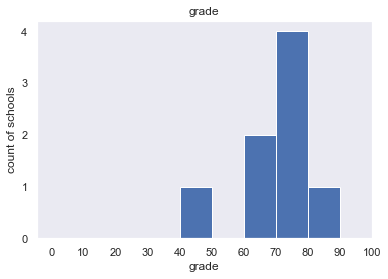

Mode: ModeResult(mode=array([74]), count=array([2]))
mean      68.625
median    72.500
Name: grade, dtype: float64
Mean is lower than median, but still relatively close. An outlier is lowering the mean.
Range: 40
IQR: 9.5
std     12.727221
var    161.982143
Name: grade, dtype: float64


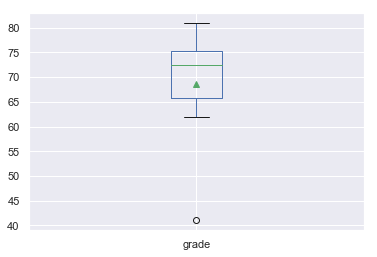

[ 0.45148245  0.87146612 -2.3204098   1.03945959 -0.55647837  0.19949224
  0.45148245 -0.13649469]


In [6]:
#1. What does the distribution look like?
df.hist(column='grade',grid=False,bins=range(0,100,10))
plt.xticks(np.arange(0, 110, step=10))
plt.xlabel('grade')
plt.yticks(np.arange(0,5))
plt.ylabel('count of schools')
plt.show()
#2. What is the center of the distribution?
print('Mode:',stats.mode(df['grade']))
print(df['grade'].agg([np.mean,np.median]))
print("Mean is lower than median, but still relatively close. An outlier is lowering the mean.")
#3. What is the variability of the distribution?
df_range=df['grade'].max()-df['grade'].min()
print('Range:',df_range)
print('IQR:',stats.iqr(df['grade']))
print(df['grade'].agg([np.std,np.var]))
#4. Boxplot
df.boxplot(column='grade',showmeans=True)
plt.show()
#5. Z-Score of school 3
print(stats.zscore(df['grade']))
df['zscore']=stats.zscore(df['grade'])


In [7]:
#boxplot with plotly
py.iplot([go.Box(y=df['grade'])])
py.iplot([go.Histogram(x=df['grade'],nbinsx=5)])

In [8]:
df

,schools,grade,zscore
0,1,74,0.451482
1,2,79,0.871466
2,3,41,-2.320410
3,4,81,1.039460
4,5,62,-0.556478
5,6,71,0.199492
6,7,74,0.451482
7,8,67,-0.136495


In [9]:
#Calculations for dataframe column
#range=np.max-np.min
df['grade'].agg([np.median,np.mean])
df['grade'].quantile(.25)
df['grade'].describe()

count     8.000000
mean     68.625000
std      12.727221
min      41.000000
25%      65.750000
50%      72.500000
75%      75.250000
max      81.000000
Name: grade, dtype: float64

calculations for numpy arrays
1,2,5,5,6,6,6,9,10,10
q5= np.array([1, 10, 6, 9, 2, 5, 6, 6, 5, 10])
mode =6 stats.mode(q5) checked
median = 6 np.median(q5) checked
mean = 6 np.mean(q5) checked
range = 9 np.max(q5)-np.min(q5) checked
iqr = 3.25 stats.iqr(q5) OR np.quantile(q5,0.75)-np.quantile(q5,0.25) checked
variance = 84/9= 9.3333333 np.var(q5,ddof=1) note ddof is used for sample vs population variance
std = 3.054 np.std(q5,ddof=1) note ddof is used for sample vs population variance

In [10]:
x = [50,100,200,300]
y = [50,70,70,95]

In [11]:
stats.pearsonr(x,y)

(0.9279436074843683, 0.07205639251563169)

In [12]:
rs = stats.pearsonr(x,y)[0]

In [13]:
np.mean(x)
np.std(x,ddof=1)

110.86778913041725

In [5]:
def compute_r (x,y) :
    """manually compute the pearson coeffient (r) from two arrays"""
    z=0
    zx=0
    zy=0
    for i,j in zip(x,y):
            zx = (i-np.mean(x))/np.std(x,ddof=1)
            zy = (j-np.mean(y))/np.std(y,ddof=1)
            zxzy = zx*zy
            z += zxzy
            r = z/(len(x)-1)
    print(r)
    return(r)

In [15]:
compute_r(x,y)

0.9279436074843681


0.9279436074843681

In [33]:
def compute_regres (x,y):
    """manually compute a and b for a regression line using OLSR"""
    r = compute_r(x,y)
    sx=np.std(x,ddof=1)
    sy=np.std(y,ddof=1)
    mx=np.mean(x)
    my=np.mean(y)
    b= r*(sy/sx)
    a = my - (b*mx)
    print("y_hat=",a,"+",b,"x")
    return (a,b)

In [16]:
py.iplot([go.Scatter(x=x,y=y,mode='markers')])

In [17]:
heights = [185,182,188,188]
ratings = [47, 49.9,55.1,60.9]
presidents = ["Obama", "Bush Jr.","Clinton", "Bush Sr."]
ex = pd.DataFrame(data=[presidents,heights,ratings]).T
ex.rename(columns={0:"president",1:"height",2:"ratings"},inplace=True)

In [18]:
ex

,president,height,ratings
0,Obama,185,47
1,Bush Jr.,182,49.9
2,Clinton,188,55.1
3,Bush Sr.,188,60.9


In [26]:
py.iplot([go.Scatter(x=heights,y=ratings,text=presidents,mode='markers')])

In [28]:
stats.pearsonr(heights,ratings)

(0.7328772600875442, 0.26712273991245594)

In [37]:
compute_r(heights,ratings)

0.7328772600875443


0.7328772600875443

In [34]:
compute_regres(heights,ratings)

0.7328772600875443
y_hat= -236.6575757575758 + 1.5606060606060608 x


(-236.6575757575758, 1.5606060606060608)

In [36]:
np.square(stats.pearsonr(heights,ratings)[0])

0.5371090783534258

In [51]:
model = sm.OLS(ratings,sm.add_constant(heights)).fit()

In [52]:
print(model.params)
print(model.summary())

[-236.65757576    1.56060606]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     2.321
Date:                Fri, 11 Jan 2019   Prob (F-statistic):              0.267
Time:                        11:42:35   Log-Likelihood:                -10.804
No. Observations:                   4   AIC:                             25.61
Df Residuals:                       2   BIC:                             24.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -236.6576 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning:

omni_normtest is not valid with less than 8 observations; 4 samples were given.



In [75]:
slope, intercept, r_value, p_value, std_err =stats.linregress(heights,ratings)
line = intercept + slope*np.array(heights)
text = "Y_hat ="+str(round(intercept,2))+"+"+str(round(slope,2))+"x"+"  R^2:" +str(round((r_value**2),2))
print(text)

Y_hat =-236.66+1.56x  R^2:0.54


In [73]:
stats.linregress(heights,ratings)

LinregressResult(slope=1.5606060606060606, intercept=-236.65757575757576, rvalue=0.7328772600875442, pvalue=0.2671227399124557, stderr=1.024439643913705)

In [76]:
py.iplot([go.Scatter(x=heights,y=ratings,text=presidents,mode='markers',name='Data'),
          go.Scatter(x=heights,y=(intercept + slope*np.array(heights)),mode='lines',text=text,name='Fit')])

In [77]:
q=[2, 4, 1.5, 2, 3]
w=[7, 3, 8, 8, 6]
compute_r(q,w)

-0.9644856443408243


-0.9644856443408243

In [78]:
.8*.8

0.6400000000000001

In [3]:
x = [4,4,2,9,7,9,6,4,7,8]
print('IQR:',stats.iqr(x))

IQR: 3.75


In [6]:
x = [1,6,7]
y=[23,48,41]
compute_r(x,y)

0.9085468432313187


0.9085468432313187